# Spectroscopy Data Analysis

# Technical Set Up

In [61]:
# Imports + global settings
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 160)

In [62]:
# Paths (relative to repo root)
REPO_ROOT = Path(".")          # run notebook from Spec_Report/
DATA_DIR = REPO_ROOT / "data"

LAB_PATH = DATA_DIR / "Germany_lab.csv"
SPC_PATH = DATA_DIR / "Germany_spc.csv"

LAB_PATH, SPC_PATH

(PosixPath('data/Germany_lab.csv'), PosixPath('data/Germany_spc.csv'))

# Inspect Data

In [63]:
# Cell 3 — Load CSVs
lab = pd.read_csv(LAB_PATH)
spc = pd.read_csv(SPC_PATH)

print("lab:", lab.shape)
print("spc:", spc.shape)

display(lab)
display(spc)

lab: (1819, 20)
spc: (1819, 1001)


,Unnamed: 0,SAMPLE_ID,CLAY,SILT,SAND,SOC,CaCO3,N,P,K,CEC,GPS_PROJ,GPS_LAT,GPS_LONG,LC1,LC2,LU1,LU2,MINERAL,COUNTRY
0,1,1093,4.0,18.0,78.0,22.2,0,1.7,80.5,10.7,7.7,WGS84,52.64524,9.33543,B21,8,U111,8,mineral,GERMANY
1,2,1094,16.0,34.0,51.0,13.0,2,1.5,43.8,183.7,13.1,WGS84,52.57206,9.12973,B55,8,U111,8,mineral,GERMANY
2,3,1095,18.0,38.0,43.0,19.9,2,1.8,50.1,196.1,14.3,WGS84,53.00170,8.91282,B32,8,U111,8,mineral,GERMANY
3,4,1096,5.0,11.0,84.0,12.1,0,1.2,105.0,166.4,2.4,WGS84,52.80699,9.33269,B16,8,U111,8,mineral,GERMANY
4,5,1097,1.0,3.0,95.0,21.7,1,0.9,0.0,30.4,2.2,WGS84,52.77242,9.65920,C20,8,U120,8,mineral,GERMANY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,1815,40039,15.0,30.0,55.0,29.1,1,2.5,21.4,52.2,14.9,WGS84,51.62220,10.27435,E20,8,U111,8,mineral,GERMANY
1815,1816,40040,18.0,78.0,4.0,14.1,2,1.5,44.6,222.1,15.3,WGS84,51.65822,10.24568,B13,8,U111,8,mineral,GERMANY
1816,1817,40041,16.0,82.0,2.0,11.6,0,1.2,20.7,42.3,5.4,WGS84,51.80220,10.13046,C20,8,U120,8,mineral,GERMANY
1817,1818,40044,8.0,39.0,53.0,49.4,2,1.8,36.3,77.6,9.0,WGS84,50.78921,8.79453,C30,8,U120,U361,mineral,GERMANY


,Unnamed: 0,500,502,504,506,508,510,512,514,516,518,520,522,524,526,528,530,532,534,536,538,540,542,544,546,548,550,552,554,556,558,560,562,564,566,568,570,572,574,576,578,580,582,584,586,588,590,592,594,596,598,600,602,604,606,608,610,612,614,616,...,2380,2382,2384,2386,2388,2390,2392,2394,2396,2398,2400,2402,2404,2406,2408,2410,2412,2414,2416,2418,2420,2422,2424,2426,2428,2430,2432,2434,2436,2438,2440,2442,2444,2446,2448,2450,2452,2454,2456,2458,2460,2462,2464,2466,2468,2470,2472,2474,2476,2478,2480,2482,2484,2486,2488,2490,2492,2494,2496,2498
0,1093,0.095642,0.096142,0.096654,0.097187,0.097732,0.098289,0.098850,0.099422,0.100004,0.100597,0.101197,0.101802,0.102409,0.103016,0.103624,0.104234,0.104846,0.105458,0.106072,0.106689,0.107309,0.107934,0.108563,0.109194,0.109827,0.110459,0.111088,0.111716,0.112342,0.112968,0.113593,0.114212,0.114831,0.115446,0.116063,0.116677,0.117289,0.117898,0.118500,0.119099,0.119690,0.120276,0.120863,0.121436,0.121995,0.122552,0.123110,0.123671,0.124229,0.124783,0.125339,0.125897,0.126458,0.127029,0.127612,0.128201,0.128799,0.129406,0.130029,...,0.306969,0.306826,0.306692,0.306573,0.306477,0.306407,0.306335,0.306250,0.306166,0.306081,0.305984,0.305863,0.305711,0.305524,0.305307,0.305062,0.304812,0.304570,0.304318,0.304035,0.303734,0.303425,0.303113,0.302787,0.302439,0.302074,0.301708,0.301361,0.301012,0.300638,0.300260,0.299895,0.299521,0.299140,0.298775,0.298426,0.298068,0.297698,0.297327,0.296950,0.296557,0.296144,0.295759,0.295416,0.295086,0.294748,0.294422,0.294107,0.293795,0.293502,0.293230,0.292978,0.292750,0.292547,0.292371,0.292219,0.292103,0.292022,0.291972,0.291956
1,1094,0.128091,0.129015,0.129967,0.130951,0.131961,0.132996,0.134044,0.135112,0.136202,0.137310,0.138438,0.139588,0.140763,0.141966,0.143191,0.144450,0.145734,0.147049,0.148396,0.149782,0.151209,0.152684,0.154211,0.155797,0.157438,0.159141,0.160900,0.162715,0.164578,0.166485,0.168422,0.170390,0.172379,0.174368,0.176349,0.178313,0.180255,0.182183,0.184074,0.185915,0.187714,0.189459,0.191145,0.192773,0.194348,0.195877,0.197357,0.198789,0.200164,0.201487,0.202779,0.204039,0.205266,0.206463,0.207640,0.208787,0.209901,0.210994,0.212069,...,0.386909,0.386604,0.386318,0.386066,0.385847,0.385656,0.385487,0.385318,0.385139,0.384951,0.384734,0.384459,0.384121,0.383745,0.383335,0.382863,0.382326,0.381752,0.381151,0.380506,0.379818,0.379117,0.378398,0.377648,0.376878,0.376078,0.375264,0.374487,0.373728,0.372982,0.372265,0.371573,0.370911,0.370287,0.369684,0.369107,0.368568,0.368050,0.367538,0.367015,0.366479,0.365941,0.365414,0.364903,0.364408,0.363933,0.363478,0.363023,0.362558,0.362085,0.361615,0.361151,0.360714,0.360308,0.359926,0.359587,0.359299,0.359047,0.358851,0.358711
2,1095,0.120313,0.121161,0.122029,0.122927,0.123852,0.124802,0.125769,0.126760,0.127778,0.128819,0.129881,0.130963,0.132062,0.133180,0.134314,0.135474,0.136655,0.137860,0.139089,0.140346,0.141629,0.142948,0.144305,0.145701,0.147138,0.148615,0.150127,0.151671,0.153244,0.154837,0.156448,0.158073,0.159713,0.161347,0.162968,0.164584,0.166171,0.167739,0.169278,0.170793,0.172274,0.173718,0.175137,0.176513,0.177841,0.179136,0.180404,0.181645,0.182857,0.184044,0.185209,0.186346,0.187457,0.188553,0.189650,0.190736,0.191801,0.192847,0.193883,...,0.387125,0.386627,0.386157,0.385725,0.385327,0.384963,0.384630,0.384289,0.383942,0.383603,0.383246,0.382846,0.382397,0.381901,0.381358,0.380781,0.380169,0.379528,0.378862,0.378144,0.377367,0.376545,0.375685,0.374810,0.373904,0.372974,0.372093,0.371264,0.370429,0.369565,0.368693,0.367849,0.367048,0.366314,0.365658,0.364990,0.364280,0.363565,0.362865,0.362153,0.361439,0.360750,0.360075,0.359416,0.358785,0.358203,0.357644,0.357037,0.356364,0.355665,0.355012,0.354438,0.353927,0.353439,0.352977,0.352555,0.352161,0.351802,0.351477,0.351193
3,1096,0.127185,0.128030,0.128900,0.129801,0.130725,0.131672,0.132630,0.133606,0.134598,0.135602,0.136618,0.137646,0.138684,0.139730,0.140781,0.141839,0.142900,0.143964,0.145030,0.146101,0.147174,0.1482

In [64]:
# Cell 2 — NA summary (where + how many)
def na_report(df: pd.DataFrame, name: str) -> pd.DataFrame:
    na = df.isna().sum()
    na = na[na > 0].sort_values(ascending=False)
    out = na.to_frame("n_missing")
    out["dataset"] = name
    return out

na_lab = na_report(lab, "lab")
na_spc = na_report(spc, "spc")

print("Total NA lab:", int(lab.isna().sum().sum()))
print("Total NA spc:", int(spc.isna().sum().sum()))

display(na_lab)
display(na_spc)

Total NA lab: 78
Total NA spc: 0


,n_missing,dataset
CLAY,26,lab
SILT,26,lab
SAND,26,lab


,n_missing,dataset


n bands: 1000
min wl: 500 | max wl: 2498
step sizes (unique): [2]
any gaps (step != 2): False


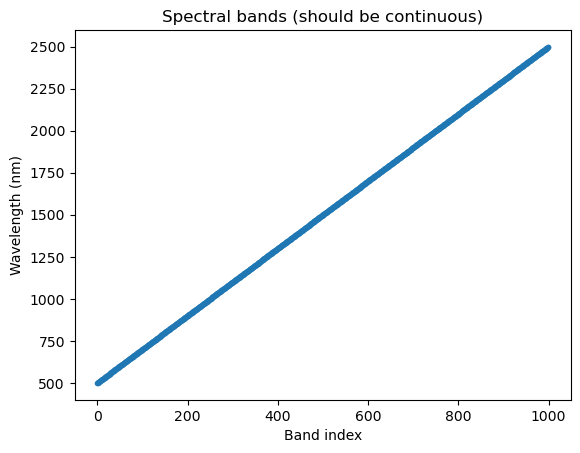

In [65]:
# Spectral bands check (are wavelengths continuous and evenly spaced?)
bands = spc.columns[1:]  # first col is "Unnamed: 0"
wl = bands.astype(int).to_numpy()

dwl = np.diff(wl)

print("n bands:", len(wl))
print("min wl:", wl.min(), "| max wl:", wl.max())
print("step sizes (unique):", np.unique(dwl))
print("any gaps (step != 2):", np.any(dwl != 2))

plt.figure()
plt.plot(wl, ".")
plt.xlabel("Band index")
plt.ylabel("Wavelength (nm)")
plt.title("Spectral bands (should be continuous)")
plt.show()

- all Bands are in equal spacing and present -> no need for preprocessing in bands

In [66]:
# Cell — Global plotting colors

COLORS = {
    "full": "#1a1a1a",      # near black
    "cal":  "#1f77b4",      # deep blue
    "test": "#ff7f0e",      # orange
}

Global reflectance range:
  Min = 0.0352
  Max = 0.6591

Value counts:
  Negative values        : 0
  Values > 1.0           : 0
  Values > 0.5           : 102281

Per-spectrum range:
  Lowest spectrum min reflectance  : 0.0352
  Highest spectrum max reflectance : 0.6591
  Spectrum with highest max reflectance: row 227, SAMPLE_ID=1355


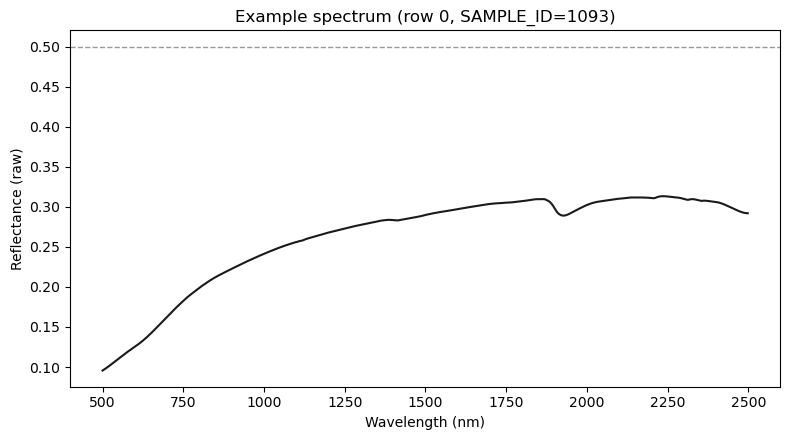

In [67]:
# Cell — Spectral sanity check + example spectrum

# full spectral matrix (exclude ID column)
R = spc.iloc[:, 1:].to_numpy(dtype=float)

global_min = float(np.min(R))
global_max = float(np.max(R))

n_negative = int(np.sum(R < 0))
n_above_1 = int(np.sum(R > 1.0))
n_above_05 = int(np.sum(R > 0.5))

print("Global reflectance range:")
print(f"  Min = {global_min:.4f}")
print(f"  Max = {global_max:.4f}")
print()
print("Value counts:")
print(f"  Negative values        : {n_negative}")
print(f"  Values > 1.0           : {n_above_1}")
print(f"  Values > 0.5           : {n_above_05}")

# per-spectrum extremes
spec_min = R.min(axis=1)
spec_max = R.max(axis=1)

print()
print("Per-spectrum range:")
print(f"  Lowest spectrum min reflectance  : {spec_min.min():.4f}")
print(f"  Highest spectrum max reflectance : {spec_max.max():.4f}")

# identify most extreme spectrum (highest reflectance)
idx_high = int(np.argmax(spec_max))
print(f"  Spectrum with highest max reflectance: row {idx_high}, SAMPLE_ID={spc.iloc[idx_high,0]}")

# Plot one example spectrum
i = 0  # change index if needed
y = R[i]

plt.figure(figsize=(8, 4.5))
plt.plot(wl, y, color=COLORS["full"])
plt.axhline(0.5, color="#999999", linestyle="--", linewidth=1.0)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance (raw)")
plt.title(f"Example spectrum (row {i}, SAMPLE_ID={spc.iloc[i,0]})")
plt.tight_layout()
plt.show()

- example plot looks good
- values are ranging between 0.035 and 0.66. these are normal ranges
    - no negative values, no values above 1
    - -> spectra are considered as good data quality, no further preprocessed
    - already set to reflectance 0 between 1

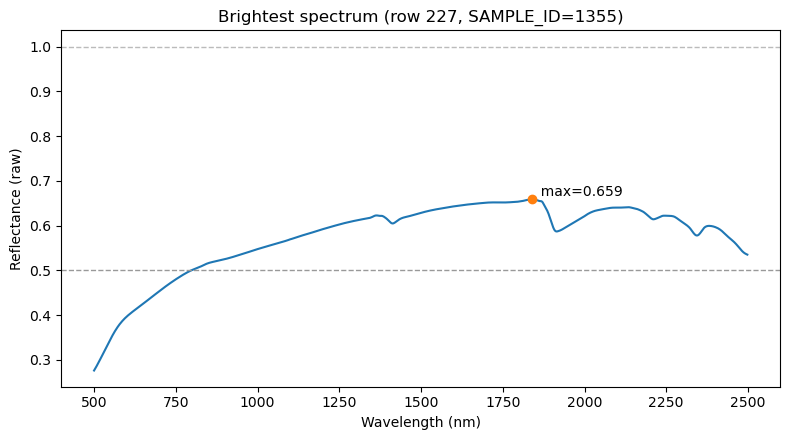

In [68]:
# Cell — Plot brightest spectrum

idx_high = int(np.argmax(spec_max))
sample_id_high = spc.iloc[idx_high, 0]
y_high = R[idx_high]

plt.figure(figsize=(8, 4.5))
plt.plot(wl, y_high, color=COLORS["cal"], linewidth=1.5)
plt.axhline(0.5, color="#999999", linestyle="--", linewidth=1.0)
plt.axhline(1.0, color="#bbbbbb", linestyle="--", linewidth=1.0)

plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance (raw)")
plt.title(f"Brightest spectrum (row {idx_high}, SAMPLE_ID={sample_id_high})")

# annotate maximum reflectance
max_val = y_high.max()
max_wl = wl[np.argmax(y_high)]
plt.scatter(max_wl, max_val, color=COLORS["test"], zorder=3)
plt.text(max_wl, max_val, f"  max={max_val:.3f}", va="bottom")

plt.tight_layout()
plt.show()

- highest spectrum is continous with no disturbances
- indicating just a high spectrum -> no bad data

SOC NA: 0
SOC min: 3.0
SOC max: 500.3
SOC mean: 32.511105002748764
SOC median: 20.5
SOC std: 44.08241416423645


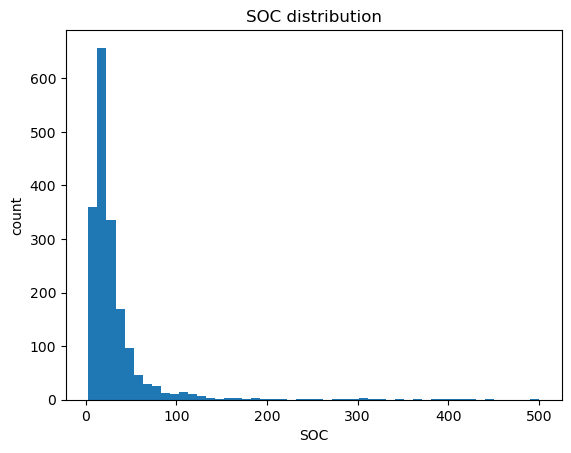

In [69]:
# SOC inspection
soc = lab["SOC"]

print("SOC NA:", int(soc.isna().sum()))
print("SOC min:", float(soc.min()))
print("SOC max:", float(soc.max()))
print("SOC mean:", float(soc.mean()))
print("SOC median:", float(soc.median()))
print("SOC std:", float(soc.std()))

plt.figure()
plt.hist(soc.to_numpy(dtype=float), bins=50)
plt.xlabel("SOC")
plt.ylabel("count")
plt.title("SOC distribution")
plt.show()

- most SOC values are below 150 -> indicating non organic SOC, as we want
- some values are too high, propably organic SOC -> will be excluded anyway

In [70]:
# Clean + merge + remove organic soils

lab = lab.drop(columns=["Unnamed: 0"])
spc = spc.rename(columns={"Unnamed: 0": "SAMPLE_ID"})

df = lab.merge(spc, on="SAMPLE_ID", how="inner")

# remove organic soils
df = df[df["MINERAL"] != "organic"]

print("Final dataset shape:", df.shape)
print("Max SOC:", df["SOC"].max())

#recall dataset
df_base = df
df_base

Final dataset shape: (1747, 1019)
Max SOC: 113.5


,SAMPLE_ID,CLAY,SILT,SAND,SOC,CaCO3,N,P,K,CEC,GPS_PROJ,GPS_LAT,GPS_LONG,LC1,LC2,LU1,LU2,MINERAL,COUNTRY,500,502,504,506,508,510,512,514,516,518,520,522,524,526,528,530,532,534,536,538,540,542,544,546,548,550,552,554,556,558,560,562,564,566,568,570,572,574,576,578,580,...,2380,2382,2384,2386,2388,2390,2392,2394,2396,2398,2400,2402,2404,2406,2408,2410,2412,2414,2416,2418,2420,2422,2424,2426,2428,2430,2432,2434,2436,2438,2440,2442,2444,2446,2448,2450,2452,2454,2456,2458,2460,2462,2464,2466,2468,2470,2472,2474,2476,2478,2480,2482,2484,2486,2488,2490,2492,2494,2496,2498
0,1093,4.0,18.0,78.0,22.2,0,1.7,80.5,10.7,7.7,WGS84,52.64524,9.33543,B21,8,U111,8,mineral,GERMANY,0.095642,0.096142,0.096654,0.097187,0.097732,0.098289,0.098850,0.099422,0.100004,0.100597,0.101197,0.101802,0.102409,0.103016,0.103624,0.104234,0.104846,0.105458,0.106072,0.106689,0.107309,0.107934,0.108563,0.109194,0.109827,0.110459,0.111088,0.111716,0.112342,0.112968,0.113593,0.114212,0.114831,0.115446,0.116063,0.116677,0.117289,0.117898,0.118500,0.119099,0.119690,...,0.306969,0.306826,0.306692,0.306573,0.306477,0.306407,0.306335,0.306250,0.306166,0.306081,0.305984,0.305863,0.305711,0.305524,0.305307,0.305062,0.304812,0.304570,0.304318,0.304035,0.303734,0.303425,0.303113,0.302787,0.302439,0.302074,0.301708,0.301361,0.301012,0.300638,0.300260,0.299895,0.299521,0.299140,0.298775,0.298426,0.298068,0.297698,0.297327,0.296950,0.296557,0.296144,0.295759,0.295416,0.295086,0.294748,0.294422,0.294107,0.293795,0.293502,0.293230,0.292978,0.292750,0.292547,0.292371,0.292219,0.292103,0.292022,0.291972,0.291956
1,1094,16.0,34.0,51.0,13.0,2,1.5,43.8,183.7,13.1,WGS84,52.57206,9.12973,B55,8,U111,8,mineral,GERMANY,0.128091,0.129015,0.129967,0.130951,0.131961,0.132996,0.134044,0.135112,0.136202,0.137310,0.138438,0.139588,0.140763,0.141966,0.143191,0.144450,0.145734,0.147049,0.148396,0.149782,0.151209,0.152684,0.154211,0.155797,0.157438,0.159141,0.160900,0.162715,0.164578,0.166485,0.168422,0.170390,0.172379,0.174368,0.176349,0.178313,0.180255,0.182183,0.184074,0.185915,0.187714,...,0.386909,0.386604,0.386318,0.386066,0.385847,0.385656,0.385487,0.385318,0.385139,0.384951,0.384734,0.384459,0.384121,0.383745,0.383335,0.382863,0.382326,0.381752,0.381151,0.380506,0.379818,0.379117,0.378398,0.377648,0.376878,0.376078,0.375264,0.374487,0.373728,0.372982,0.372265,0.371573,0.370911,0.370287,0.369684,0.369107,0.368568,0.368050,0.367538,0.367015,0.366479,0.365941,0.365414,0.364903,0.364408,0.363933,0.363478,0.363023,0.362558,0.362085,0.361615,0.361151,0.360714,0.360308,0.359926,0.359587,0.359299,0.359047,0.358851,0.358711
2,1095,18.0,38.0,43.0,19.9,2,1.8,50.1,196.1,14.3,WGS84,53.00170,8.91282,B32,8,U111,8,mineral,GERMANY,0.120313,0.121161,0.122029,0.122927,0.123852,0.124802,0.125769,0.126760,0.127778,0.128819,0.129881,0.130963,0.132062,0.133180,0.134314,0.135474,0.136655,0.137860,0.139089,0.140346,0.141629,0.142948,0.144305,0.145701,0.147138,0.148615,0.150127,0.151671,0.153244,0.154837,0.156448,0.158073,0.159713,0.161347,0.162968,0.164584,0.166171,0.167739,0.169278,0.170793,0.172274,...,0.387125,0.386627,0.386157,0.385725,0.385327,0.384963,0.384630,0.384289,0.383942,0.383603,0.383246,0.382846,0.382397,0.381901,0.381358,0.380781,0.380169,0.379528,0.378862,0.378144,0.377367,0.376545,0.375685,0.374810,0.373904,0.372974,0.372093,0.371264,0.370429,0.369565,0.368693,0.367849,0.367048,0.366314,0.365658,0.364990,0.364280,0.363565,0.362865,0.362153,0.361439,0.360750,0.360075,0.359416,0.358785,0.358203,0.357644,0.357037,0.356364,0.355665,0.355012,0.354438,0.353927,0.353439,0.352977,0.352555,0.352161,0.351802,0.351477,0.351193
3,1096,5.0,11.0,84.0,12.1,0,1.2,105.0,166.4,2.4,WGS84,52.80699,9.33269,B16,8,U111,8,mineral,GERMANY,0.127185,0.128030,0.128900,0.129801,0.130725,0.131672,0.132630,0.133606,0.134598,0.135602,0.136618,0.137646,0.138684,0.139730,0.140781,0.141839,0.142900,0.143964,0.145030,0.146101,0.147174,0.148253,0.149338,0.150430,0.151530,0.152637,0.153747,0.154862,0.155981,0.157102,0.158226,0.159343,0

In [71]:
na_report(df_base, "final")

,n_missing,dataset


SOC NA: 0
SOC min: 3.0
SOC max: 113.5
SOC mean: 25.433829421866054
SOC median: 19.9
SOC std: 17.26527032461734


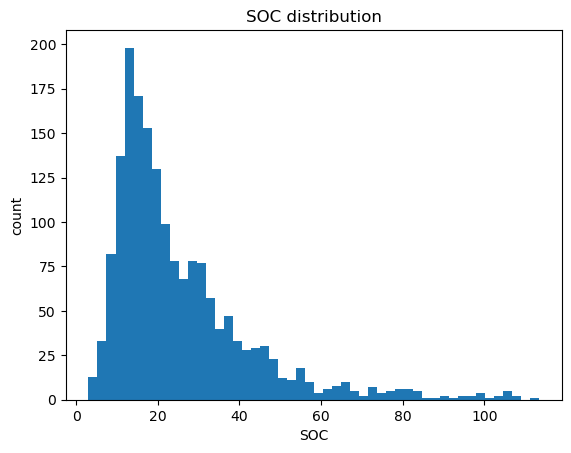

In [72]:
# SOC inspection after merging
soc = df_base["SOC"]

print("SOC NA:", int(soc.isna().sum()))
print("SOC min:", float(soc.min()))
print("SOC max:", float(soc.max()))
print("SOC mean:", float(soc.mean()))
print("SOC median:", float(soc.median()))
print("SOC std:", float(soc.std()))

plt.figure()
plt.hist(soc.to_numpy(dtype=float), bins=50)
plt.xlabel("SOC")
plt.ylabel("count")
plt.title("SOC distribution")
plt.show()

- after merging and exluding organic SOC -> no NA values anymore in combined data 
- SOC max reduces to 113.5 indicating that all high SOC values were in "organic" SOC and are removed succefully
- the data **looks good and is now ready for training**

# 1) Data Splitting

In [73]:
# Fixed seed + split (70/30), store indices (test must stay fixed)
from sklearn.model_selection import train_test_split

SEED = 42
train_idx, test_idx = train_test_split(df_base.index, test_size=0.30, random_state=SEED)

df_cal = df_base.loc[train_idx].copy()
df_test = df_base.loc[test_idx].copy()

print("Seed:", SEED)
print("Calibration:", df_cal.shape)
print("Test:", df_test.shape)

Seed: 42
Calibration: (1222, 1019)
Test: (525, 1019)


In [74]:
# Cell — SOC stats (full vs cal vs test) + absolute |test-cal| differences
def soc_stats(s: pd.Series) -> pd.Series:
    return pd.Series({
        "N": int(s.shape[0]),
        "Min": float(s.min()),
        "Max": float(s.max()),
        "Mean": float(s.mean()),
        "Median": float(s.median()),
        "Std": float(s.std()),
    })

stats = pd.DataFrame({
    "Full": soc_stats(df_base["SOC"]),
    "Calibration": soc_stats(df_cal["SOC"]),
    "Test": soc_stats(df_test["SOC"]),
})

stats["|Test - Calibration|"] = (stats["Test"] - stats["Calibration"]).abs()

display(stats)

,Full,Calibration,Test,|Test - Calibration|
N,1747.000000,1222.000000,525.000000,697.000000
Min,3.000000,3.000000,3.700000,0.700000
Max,113.500000,113.500000,103.700000,9.800000
Mean,25.433829,25.704664,24.803429,0.901236
Median,19.900000,20.200000,19.000000,1.200000
Std,17.265270,17.429468,16.876458,0.553010


- all basic statistics are pretty similar for full, test and calibration data -> indicating represntative for each other

- one small finding:
    - we will later see that the RMSE CV error in preprocessing is higher than the RMSE test
    - this can maybe be explained by the higher std in calibration than test

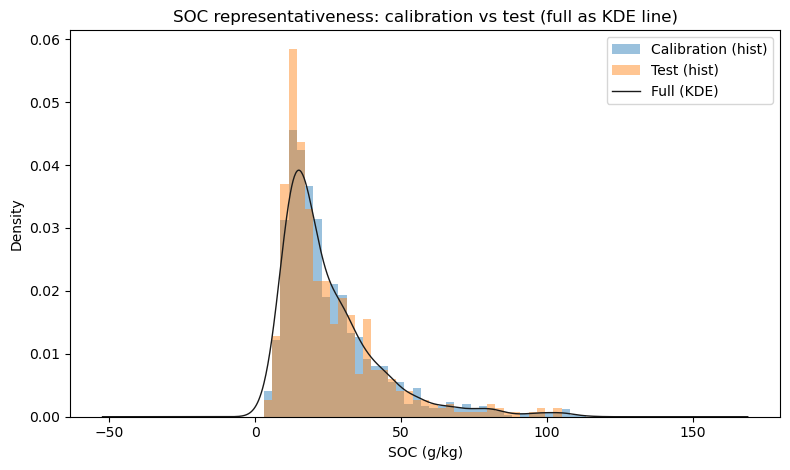

In [75]:
# Cell — SOC distribution: cal vs test as histograms, full as KDE line (black)
soc_full = df_base["SOC"].to_numpy(dtype=float)
soc_cal  = df_cal["SOC"].to_numpy(dtype=float)
soc_test = df_test["SOC"].to_numpy(dtype=float)

bins = np.linspace(soc_full.min(), soc_full.max(), 40)

fig, ax = plt.subplots(figsize=(8, 4.8))

# histograms (counts or density; density is better for comparing different N)
ax.hist(soc_cal,  bins=bins, density=True, alpha=0.45, color=COLORS["cal"], label="Calibration (hist)")
ax.hist(soc_test, bins=bins, density=True, alpha=0.45, color=COLORS["test"], label="Test (hist)")

# full KDE as black line
df_base["SOC"].plot.kde(ax=ax, color=COLORS["full"], linewidth=1, label="Full (KDE)")

ax.set_xlabel("SOC (g/kg)")
ax.set_ylabel("Density")
ax.set_title("SOC representativeness: calibration vs test (full as KDE line)")
ax.legend(frameon=True, loc="best")

plt.tight_layout()
plt.show()

- from plotting the distributions we see that all 3 distributions folow the same pdf
    - test data is slighlty a bit more left skewed vs calibration a bit more right skewed
- indicating represntation

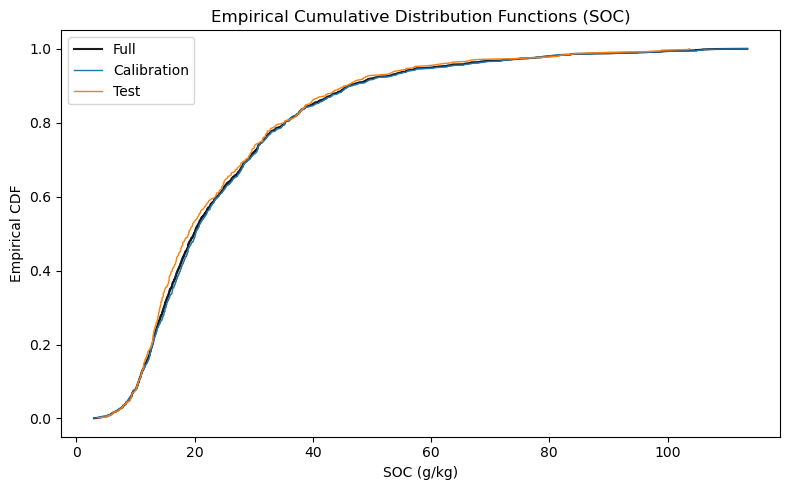

In [76]:
# Cell — Empirical CDF plot (Full, Calibration, Test)

def ecdf(values):
    x = np.sort(values)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

soc_full = df_base["SOC"].to_numpy(dtype=float)
soc_cal  = df_cal["SOC"].to_numpy(dtype=float)
soc_test = df_test["SOC"].to_numpy(dtype=float)

x_full, y_full = ecdf(soc_full)
x_cal,  y_cal  = ecdf(soc_cal)
x_test, y_test = ecdf(soc_test)

plt.figure(figsize=(8, 5))

plt.plot(x_full, y_full, color=COLORS["full"], linewidth=1.5, label="Full")
plt.plot(x_cal,  y_cal,  color=COLORS["cal"], linewidth=1, label="Calibration")
plt.plot(x_test, y_test, color=COLORS["test"], linewidth=1, label="Test")

plt.xlabel("SOC (g/kg)")
plt.ylabel("Empirical CDF")
plt.title("Empirical Cumulative Distribution Functions (SOC)")
plt.legend(frameon=True, loc="best")
plt.tight_layout()
plt.show()

In [77]:
# Cell — KS tests: subsets vs full dataset

from scipy.stats import ks_2samp

# SOC tests
ks_cal_full = ks_2samp(df_cal["SOC"], df_base["SOC"])
ks_test_full = ks_2samp(df_test["SOC"], df_base["SOC"])

ks_results = pd.DataFrame({
    "Comparison": [
        "Calibration vs Full",
        "Test vs Full"
    ],
    "KS statistic": [
        ks_cal_full.statistic,
        ks_test_full.statistic
    ],
    "p-value": [
        ks_cal_full.pvalue,
        ks_test_full.pvalue
    ]
})

ks_results["KS statistic"] = ks_results["KS statistic"].round(4)
ks_results["p-value"] = ks_results["p-value"].apply(lambda x: f"{x:.3e}")

display(ks_results)

,Comparison,KS statistic,p-value
0,Calibration vs Full,0.0183,9.653e-01
1,Test vs Full,0.0425,4.436e-01


## 1.1) Demonstrate that both subsets are representative of the full data set

- statistics and PDFs are already indicating representativeness 

- but **final proof**: KS test and CDFs
    - KS test compares the maximum differnces of the CDFs from cal-full and test-full, so its the max vertical distance from the CDF plot -> Ks statistic vlaue -> D value
    
    1. Calibration vs Full: 1,8% maximum difference, meaning at some SOC value in the calibration data we have less cumulative density -> meaning full data contains a bit more low SOC values
    2. Test vs. Full: stronger and vice versa

    - both have high p values meaning that its very likely that they are from the same distribution (low p value here indicates differnt distributions, H0 hypothesies)

    - **summary: low K-S and high p indicating for that Cal and Test data is reprenstative for Full data**



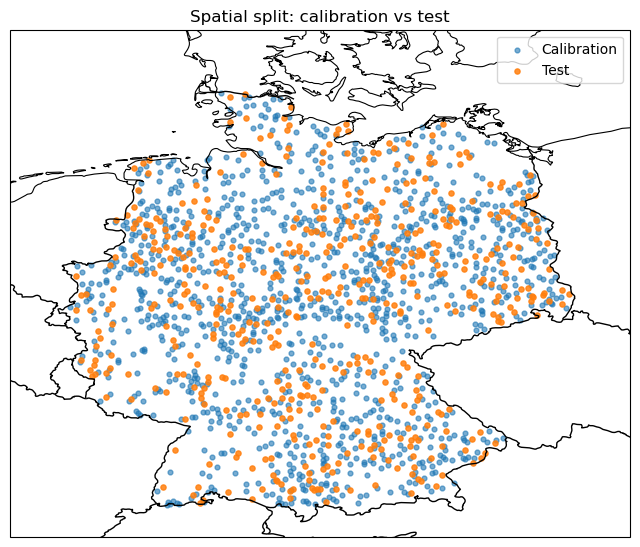

In [78]:
# Cell — Spatial plot with Germany boundary (Cartopy)
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(6.5, 7))
ax = plt.axes(projection=ccrs.PlateCarree())

# Germany border
ax.add_feature(cfeature.BORDERS, linewidth=1.0)
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)

# Focus map extent roughly on Germany
ax.set_extent([5, 16, 47, 56], crs=ccrs.PlateCarree())

# Points
ax.scatter(
    df_cal["GPS_LONG"],
    df_cal["GPS_LAT"],
    s=12,
    color=COLORS["cal"],
    alpha=0.6,
    label="Calibration",
    transform=ccrs.PlateCarree()
)

ax.scatter(
    df_test["GPS_LONG"],
    df_test["GPS_LAT"],
    s=14,
    color=COLORS["test"],
    alpha=0.85,
    label="Test",
    transform=ccrs.PlateCarree()
)

plt.title("Spatial split: calibration vs test")
plt.legend(frameon=True)
plt.tight_layout()
plt.show()

- this just shows that by random splitting we also cover whole germany more or less, becasue we have enough data points

# 2) Baseline Model

In [79]:
# Helpers: metrics + plots (reused for all strategies)
from dataclasses import dataclass
from typing import Dict, Tuple

from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score

# Global colors (already defined earlier)
# COLORS = {"full":"#1a1a1a", "cal":"#1f77b4", "test":"#ff7f0e"}

def compute_metrics(y_true, y_pred) -> Dict[str, float]:
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()
    resid = y_pred - y_true
    rmse = float(np.sqrt(np.mean(resid**2)))
    bias = float(np.mean(resid))                 # mean(pred - obs)
    r2 = float(r2_score(y_true, y_pred))
    rpd = float(np.std(y_true, ddof=1) / rmse)   # std(obs)/RMSE
    return {"R²": r2, "RMSE": rmse, "Bias": bias, "RPD": rpd}

def plot_obs_pred(y_true, y_pred, title: str, color: str, metrics: Dict[str, float] = None):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()

    mn = float(min(y_true.min(), y_pred.min()))
    mx = float(max(y_true.max(), y_pred.max()))
    pad = 0.02 * (mx - mn) if mx > mn else 1.0
    mn, mx = mn - pad, mx + pad

    plt.figure(figsize=(6.2, 6.2))
    plt.scatter(y_true, y_pred, s=18, alpha=0.75, color=color)
    plt.plot([mn, mx], [mn, mx], color=COLORS["full"], linewidth=1.8)  # 1:1
    plt.xlim(mn, mx)
    plt.ylim(mn, mx)
    plt.xlabel("Observed SOC (g/kg)")
    plt.ylabel("Predicted SOC (g/kg)")
    plt.title(title)

    if metrics is not None:
        txt = (f"R² = {metrics['R²']:.3f}\n"
               f"RMSE = {metrics['RMSE']:.2f}\n"
               f"Bias = {metrics['Bias']:.2f}\n"
               f"RPD = {metrics['RPD']:.2f}")
        plt.text(0.02, 0.98, txt, transform=plt.gca().transAxes, va="top", ha="left")

    plt.tight_layout()
    plt.show()

def plot_rmsecv_curve(rmsecv, best_n: int, title: str = "PLSR optimization (CV)"):
    xs = np.arange(1, len(rmsecv) + 1)
    plt.figure(figsize=(7.5, 4.8))
    plt.plot(xs, rmsecv, marker="o", markersize=3, color=COLORS["cal"])
    plt.axvline(best_n, color=COLORS["full"], linewidth=1.5, linestyle="--", label=f"Best = {best_n}")
    plt.xlabel("Number of PLS components")
    plt.ylabel("RMSECV (SOC)")
    plt.title(title)
    plt.legend(frameon=False)
    plt.tight_layout()
    plt.show()

def plot_pls_coefficients(fitted_pipeline: Pipeline, wl_cols, title: str = "PLSR coefficients"):
    pls = fitted_pipeline.named_steps["pls"]
    coefs = pls.coef_.ravel()
    wl = np.array([int(c) for c in wl_cols])

    plt.figure(figsize=(8.5, 4.8))

    plt.scatter(
        wl,
        coefs,
        s=10,
        alpha=0.7,
        color=COLORS["cal"]
    )

    plt.axhline(0, color="#888888", linewidth=1.0, linestyle="--")

    plt.xlabel("Wavelength (nm)")
    plt.ylabel("PLS coefficient")
    plt.title(title)

    plt.tight_layout()
    plt.show()

In [80]:
# Cell 2 — Build X/y (spectra only) from your fixed split
wl_cols = sorted([c for c in df_base.columns if c.isdigit()], key=int)

X_cal = df_cal[wl_cols].to_numpy(dtype=float)
y_cal = df_cal["SOC"].to_numpy(dtype=float)

X_test = df_test[wl_cols].to_numpy(dtype=float)
y_test = df_test["SOC"].to_numpy(dtype=float)

print("X_cal:", X_cal.shape, "y_cal:", y_cal.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

X_cal: (1222, 1000) y_cal: (1222,)
X_test: (525, 1000) y_test: (525,)


Best n_components: 29 | RMSECV: 11.591814855243358


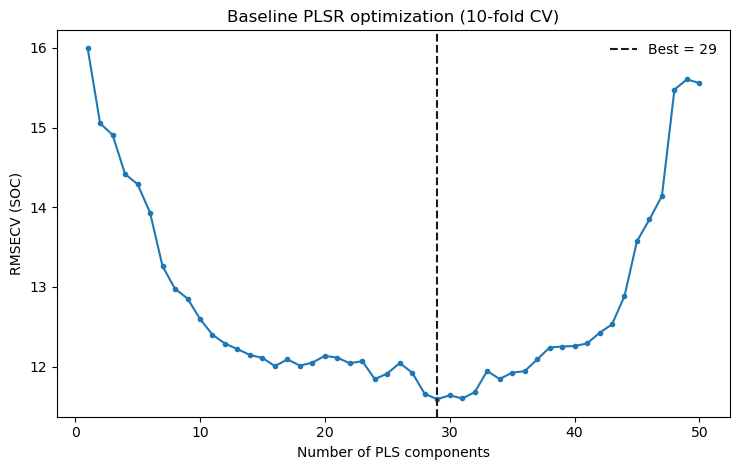

In [81]:
# Cell 3 — Internal optimization (10-fold CV on calibration) using a Pipeline (no leakage)
SEED = 42
cv = KFold(n_splits=10, shuffle=True, random_state=SEED)

max_components = 50
rmsecv = []

for n_comp in range(1, max_components + 1):
    pipe = Pipeline([
        ("scaler", StandardScaler()),            # scaling learned inside each CV split
        ("pls", PLSRegression(n_components=n_comp, scale=False))  # avoid double scaling
    ])
    y_cv = cross_val_predict(pipe, X_cal, y_cal, cv=cv).ravel()
    rmsecv.append(compute_metrics(y_cal, y_cv)["RMSE"])

best_n = int(np.argmin(rmsecv) + 1)
print("Best n_components:", best_n, "| RMSECV:", rmsecv[best_n - 1])

plot_rmsecv_curve(rmsecv, best_n, title="Baseline PLSR optimization (10-fold CV)")

- best number of LV that reduces RMSE in a 10CV most for PLSR-Base is 29
- the Base model is than trained on all calibration data with 29 LVs

In [82]:
# Cell 4 — Fit optimized baseline model on calibration, predict test, report metrics
baseline_model = Pipeline([
    ("scaler", StandardScaler()),
    ("pls", PLSRegression(n_components=best_n, scale=False))
])

baseline_model.fit(X_cal, y_cal)
y_pred_test = baseline_model.predict(X_test).ravel()

baseline_metrics = compute_metrics(y_test, y_pred_test)
display(pd.DataFrame(baseline_metrics, index=["Baseline PLSR (test)"]))

,R²,RMSE,Bias,RPD
Baseline PLSR (test),0.524534,11.625915,0.913663,1.451624


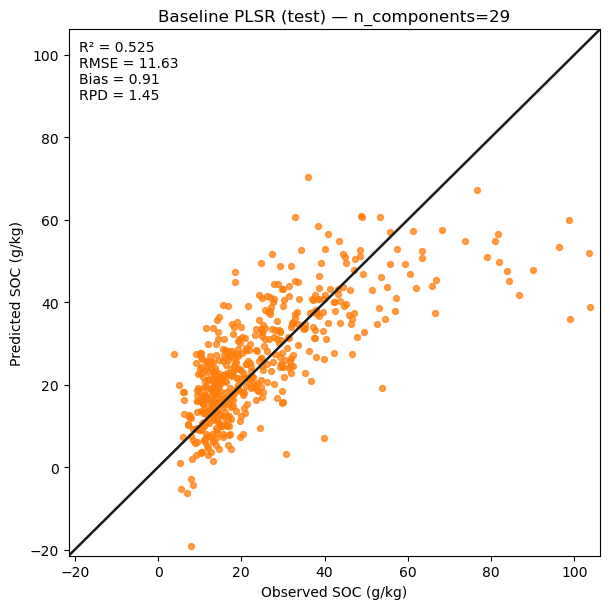

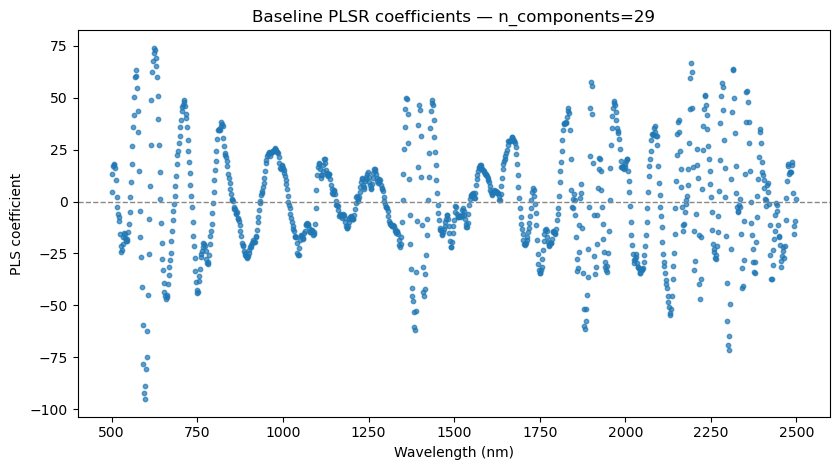

In [83]:
# Cell 5 — Observed vs Predicted (test) + coefficient plot
plot_obs_pred(
    y_test,
    y_pred_test,
    title=f"Baseline PLSR (test) — n_components={best_n}",
    color=COLORS["test"],
    metrics=baseline_metrics
)

plot_pls_coefficients(
    baseline_model,
    wl_cols,
    title=f"Baseline PLSR coefficients — n_components={best_n}"
)

- RMSE in test data is slightly higher than RMSE CV, this is expected as this is test data is unseen

- the PLSR-Base does not perform very good
    -SOC model fails especially for higher SOC contents -> underestimation
    - possible reasons:
        - maybe its non linear relationship for spectral data and SOC -> PLSR in the end is just linear regression
        - maybe lacking spectral preprocessing is leading to bad prediction
            - i think this is not the most important point as all data is very clean and with 2nm resolution and no atmosphere disturbance its pretty good quality
            - so smoothing data will not do much
        - need to interpret the spectral osciallations!

# 3) Model Improvement Strategies

## 3.1) Spectral Preprocessing

In [84]:
# Cell — Simple preprocessing functions

from scipy.signal import savgol_filter
from scipy.spatial import ConvexHull
from scipy.interpolate import interp1d

def snv(X):
    X = np.asarray(X, dtype=float)
    mean = X.mean(axis=1, keepdims=True)
    std = X.std(axis=1, keepdims=True)
    std[std == 0] = 1.0
    return (X - mean) / std


def sg_first_derivative(X, window_length=11, polyorder=2):
    X = np.asarray(X, dtype=float)
    return savgol_filter(
        X,
        window_length=window_length,
        polyorder=polyorder,
        deriv=1,
        axis=1,
        mode="interp"
    )


def continuum_removal(X, wavelengths):
    X = np.asarray(X, dtype=float)
    wl = np.asarray(wavelengths, dtype=float)
    X_out = np.zeros_like(X)

    for i in range(X.shape[0]):
        y = X[i]
        pts = np.column_stack([wl, y])
        hull = ConvexHull(pts)
        verts = hull.vertices
        verts = verts[np.argsort(wl[verts])]

        # build upper hull
        cont = interp1d(
            wl[verts],
            y[verts],
            kind="linear",
            fill_value="extrapolate",
            bounds_error=False
        )(wl)

        cont[cont == 0] = 1e-12
        X_out[i] = y / cont

    return X_out

In [85]:
# Cell — Optimization runner

from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression

def run_plsr_with_preprocessing(X_cal, y_cal, X_test, y_test, X_cal_prep, X_test_prep, name):

    cv = KFold(n_splits=10, shuffle=True, random_state=SEED)
    max_components = 50
    rmsecv = []

    for n_comp in range(1, max_components + 1):
        pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("pls", PLSRegression(n_components=n_comp, scale=False)),
        ])
        y_cv = cross_val_predict(pipe, X_cal_prep, y_cal, cv=cv).ravel()
        rmsecv.append(compute_metrics(y_cal, y_cv)["RMSE"])

    best_n = int(np.argmin(rmsecv) + 1)

    model = Pipeline([
        ("scaler", StandardScaler()),
        ("pls", PLSRegression(n_components=best_n, scale=False)),
    ])
    model.fit(X_cal_prep, y_cal)

    y_pred = model.predict(X_test_prep).ravel()
    metrics = compute_metrics(y_test, y_pred)

    metrics.update({
        "Method": name,
        "n_comp": best_n,
        "RMSECV_min": float(np.min(rmsecv))
    })

    return metrics, y_pred

In [86]:
# Cell — Execute preprocessing strategy

wavelengths = np.array([int(c) for c in wl_cols])

results = []
predictions = {}

# --- SNV ---
X_cal_snv = snv(X_cal)
X_test_snv = snv(X_test)

res_snv, pred_snv = run_plsr_with_preprocessing(
    X_cal, y_cal, X_test, y_test,
    X_cal_snv, X_test_snv,
    name="SNV"
)

results.append(res_snv)
predictions["SNV"] = pred_snv


# --- SG 1st derivative ---
X_cal_sg = sg_first_derivative(X_cal)
X_test_sg = sg_first_derivative(X_test)

res_sg, pred_sg = run_plsr_with_preprocessing(
    X_cal, y_cal, X_test, y_test,
    X_cal_sg, X_test_sg,
    name="SG 1st derivative"
)

results.append(res_sg)
predictions["SG 1st derivative"] = pred_sg


# --- Continuum removal ---
X_cal_cr = continuum_removal(X_cal, wavelengths)
X_test_cr = continuum_removal(X_test, wavelengths)

res_cr, pred_cr = run_plsr_with_preprocessing(
    X_cal, y_cal, X_test, y_test,
    X_cal_cr, X_test_cr,
    name="Continuum removal"
)

results.append(res_cr)
predictions["Continuum removal"] = pred_cr


res_df = pd.DataFrame(results)[
    ["Method", "n_comp", "RMSECV_min", "R²", "RMSE", "Bias", "RPD"]
]

display(res_df.sort_values("RMSE"))

,Method,n_comp,RMSECV_min,R²,RMSE,Bias,RPD
0,SNV,32,11.232398,0.559943,11.184633,0.784729,1.508897
2,Continuum removal,33,12.316438,0.522620,11.649283,0.814250,1.448712
1,SG 1st derivative,15,11.847572,0.510040,11.801787,0.990643,1.429992


- only SNV reduces the RMSE
    - SNV reduces the differnce in brightnesses between spectra, without deleting the brigthness infrmation itslef
    - it just makes the spectar comparable

- SG filter and first deriviative is worsening 
    - i think this is becasues its loosing brightness infromation
    - if you just look at 1st Derivitave you loose constatn high or constant low infrmation.
    - but SOC in soils is altering this brightness, so removing it is bad



32


,R²,RMSE,Bias,RPD
"PLSR+SNV (test), n_comp=32",0.559943,11.184633,0.784729,1.508897


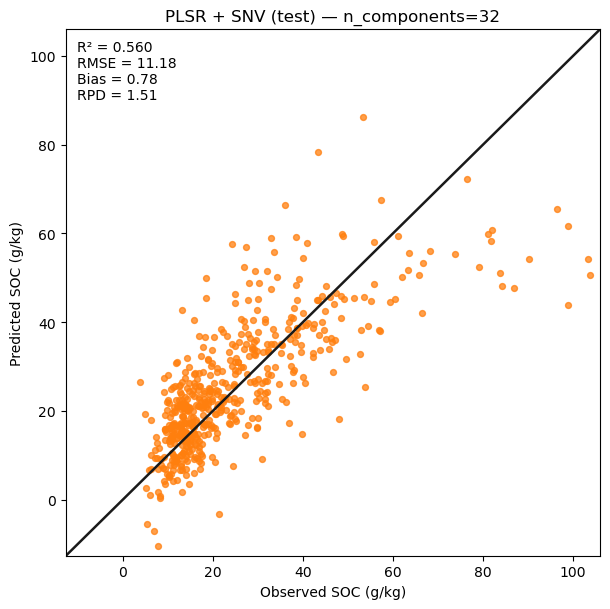

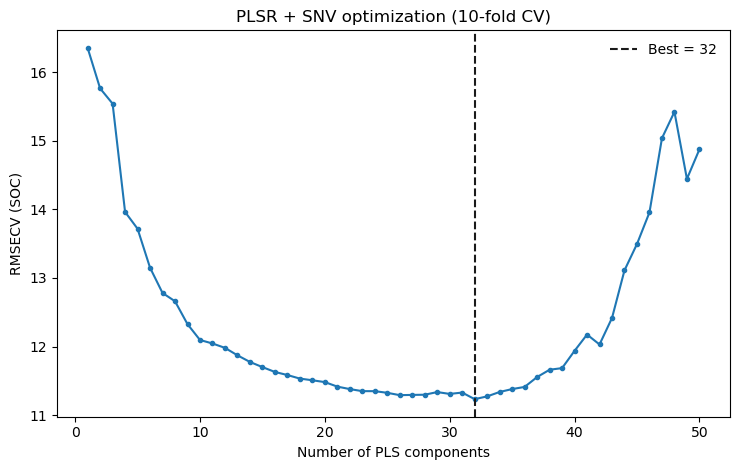

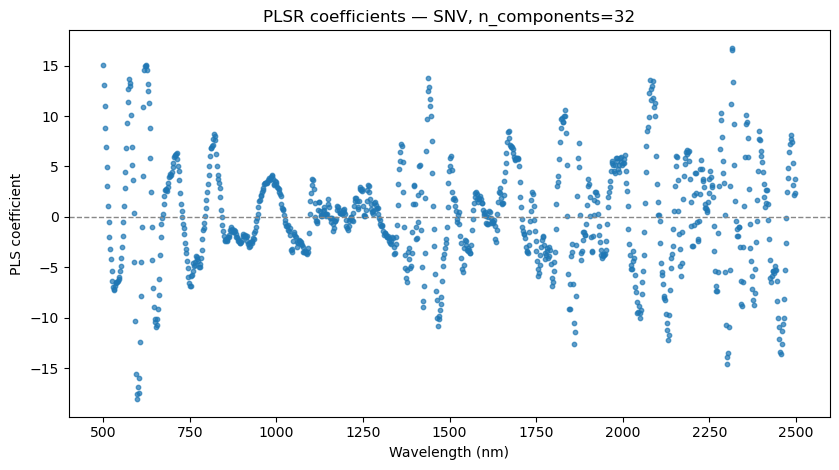

In [87]:
# Cell — SNV (selected preprocessing): plots + metrics using existing helper functions

# 1) Metrics + scatter (test)
snv_pred = predictions["SNV"]
snv_metrics = compute_metrics(y_test, snv_pred)

snv_ncomp = int(res_df.loc[res_df["Method"] == "SNV", "n_comp"].iloc[0])
print(snv_ncomp)

display(pd.DataFrame(snv_metrics, index=[f"PLSR+SNV (test), n_comp={snv_ncomp}"]))

plot_obs_pred(
    y_test,
    snv_pred,
    title=f"PLSR + SNV (test) — n_components={snv_ncomp}",
    color=COLORS["test"],
    metrics=snv_metrics
)

# 2) RMSECV curve (recompute quickly for SNV, then use plot_rmsecv_curve)
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression

cv = KFold(n_splits=10, shuffle=True, random_state=SEED)
max_components = 50
rmsecv_snv = []

X_cal_snv = snv(X_cal)

for n_comp in range(1, max_components + 1):
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("pls", PLSRegression(n_components=n_comp, scale=False)),
    ])
    y_cv = cross_val_predict(pipe, X_cal_snv, y_cal, cv=cv).ravel()
    rmsecv_snv.append(compute_metrics(y_cal, y_cv)["RMSE"])

plot_rmsecv_curve(
    rmsecv_snv,
    snv_ncomp,
    title="PLSR + SNV optimization (10-fold CV)"
)

# 3) Coefficients (fit final SNV model, then use plot_pls_coefficients)
snv_model = Pipeline([
    ("scaler", StandardScaler()),
    ("pls", PLSRegression(n_components=snv_ncomp, scale=False)),
])
snv_model.fit(X_cal_snv, y_cal)

plot_pls_coefficients(
    snv_model,
    wl_cols,
    title=f"PLSR coefficients — SNV, n_components={snv_ncomp}"
)

- SNV is the only method improving so SNV was chosen for the final spectral processing run 
- SNV leads to higher LV components needed

## 3.2) Different Method

In [88]:
# Cell 1 — Models + shared CV tuning utilities (same split, same metrics) — RAW spectra
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

SEED = 42
cv = KFold(n_splits=10, shuffle=True, random_state=SEED)

def run_gridsearch(model_name, estimator, param_grid, X_cal, y_cal, X_test, y_test):
    gs = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        scoring="neg_root_mean_squared_error",
        cv=cv,
        n_jobs=-1,
        verbose=0,
    )
    gs.fit(X_cal, y_cal)

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    out = compute_metrics(y_test, y_pred)
    out.update({
        "Model": model_name,
        "RMSECV_best": float(-gs.best_score_),
        "Best params": gs.best_params_,
    })
    return out, y_pred, best_model

# Cell 2 — Use RAW spectra (no spectral preprocessing)
X_cal_alg = X_cal
X_test_alg = X_test

In [89]:
# Cell 3 — SVR (RBF) with PCA + scaling (more fine-tuned, still reasonable runtime)

from sklearn.decomposition import PCA

svr_pca_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(random_state=SEED)),
    ("svr", SVR(kernel="rbf")),
])

# Compact but finer C grid + a few PCA sizes; gamma kept simple ("scale") for runtime
svr_pca_grid = {
    "pca__n_components":[70,80], #[20,30,40,50,60,70,80,90,100,110, 120],          # dimensionality reduction: I tested and the best PCA is 70
    "svr__C": [1, 3, 10, 30, 100, 300, 1000],        # finer C sweep
    "svr__gamma": ["scale"],                         # keep fast; expand later only if needed
    "svr__epsilon": [0.1, 0.2, 0.5],                 # same as before
}

svr_res, svr_pred, svr_best = run_gridsearch(
    "SVR (RBF) + PCA",
    svr_pca_pipe,
    svr_pca_grid,
    X_cal_alg, y_cal,
    X_test_alg, y_test
)

In [90]:
# Cell 4 — Random Forest regression (FASTER grid search)
rf = RandomForestRegressor(random_state=SEED, n_jobs=-1)

# Much smaller grid 
rf_grid_fast = {
    "n_estimators": [300],          # 1 option
    "max_depth": [None, 30],        # 2 options
    "min_samples_leaf": [1, 3],     # 2 options
    "max_features": ["sqrt", 0.3],  # 2 options
}

rf_res, rf_pred, rf_best = run_gridsearch(
    "Random Forest",
    rf,
    rf_grid_fast,
    X_cal_alg, y_cal,
    X_test_alg, y_test
)

In [91]:
# # Cell 5 — HistGradientBoosting (FASTER grid search)
# hgb = HistGradientBoostingRegressor(random_state=SEED)

# # Much smaller grid (8 combos instead of 36)
# hgb_grid_fast = {
#     "max_depth": [3, 5],           # 2
#     "learning_rate": [0.1],        # 1
#     "max_iter": [300, 600],        # 2
#     "min_samples_leaf": [20, 50],  # 2
# }

# hgb_res, hgb_pred, hgb_best = run_gridsearch(
#     "HistGradientBoosting",
#     hgb,
#     hgb_grid_fast,
#     X_cal_alg, y_cal,
#     X_test_alg, y_test
# )

# Cell 5 — PCR (PCA + Linear Regression) with full PC sweep (1–100)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

pcr_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(random_state=SEED)),
    ("linreg", LinearRegression()),
])

# Full sweep 1–100 PCs
pcr_grid_full = {
    "pca__n_components": list(range(1, 101)),
}

pcr_res, pcr_pred, pcr_best = run_gridsearch(
    "PCR (PCA + LinearReg)",
    pcr_pipe,
    pcr_grid_full,
    X_cal_alg, y_cal,   # RAW spectra
    X_test_alg, y_test
)

# Optional: inspect best number of PCs
best_k_pcr = pcr_best.named_steps["pca"].n_components
print(f"Best PCR n_components: {best_k_pcr}")

Best PCR n_components: 53


In [92]:
# Cell 6 — Summary table (test metrics + best CV RMSE + best params)
alg_results = pd.DataFrame([svr_res, rf_res, pcr_res])[ #rf_res, I printed out as it takes too long
    ["Model", "RMSECV_best", "R²", "RMSE", "Bias", "RPD", "Best params"]
].sort_values("RMSE")

display(alg_results)

alg_predictions = {
    "SVR (RBF)": svr_pred,
    "PCR": pcr_pred,
    "RF Regression": rf_pred,
}

,Model,RMSECV_best,R²,RMSE,Bias,RPD,Best params
0,SVR (RBF) + PCA,11.936849,0.605955,10.583766,-0.025659,1.594561,"{'pca__n_components': 70, 'svr__C': 1000, 'svr..."
2,PCR (PCA + LinearReg),11.492785,0.527394,11.590893,0.804060,1.456010,{'pca__n_components': 53}
1,Random Forest,13.691182,0.423295,12.803955,1.572832,1.318066,"{'max_depth': None, 'max_features': 0.3, 'min_..."


- PCR only imrpoves Base-Plsr a bit

- RF fails, probably becasue it does not find the best tuning as RMSECV is also very high
    - so it does not overfit but underfit

- SVR with PCA improves Base Model a lot!
    - SVR needs to run on PCA before, becasue it just makes a function in more-dim space
    - so becasue we have almost 1000 Bnads/ dimensiosn we need to reduce the space so that SVR can fit a meaningful function around the data
    - it is non linear so probably it is good becasue of this

,R²,RMSE,Bias,RPD
"SVR (RBF) + PCA (test), n_PCA=70",0.605955,10.583766,-0.025659,1.594561


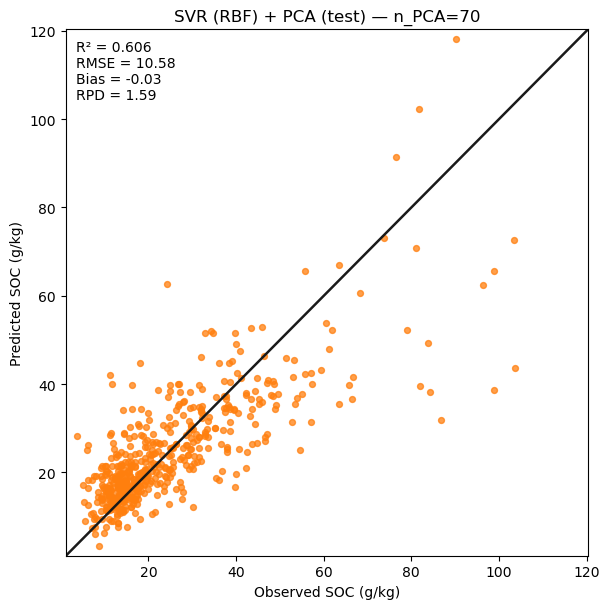

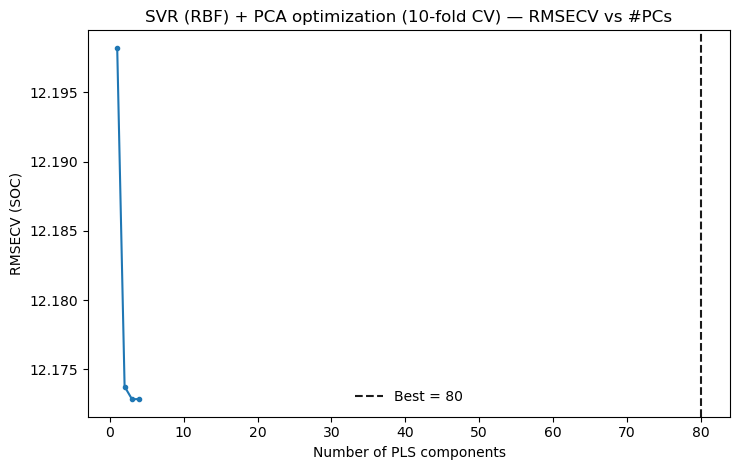

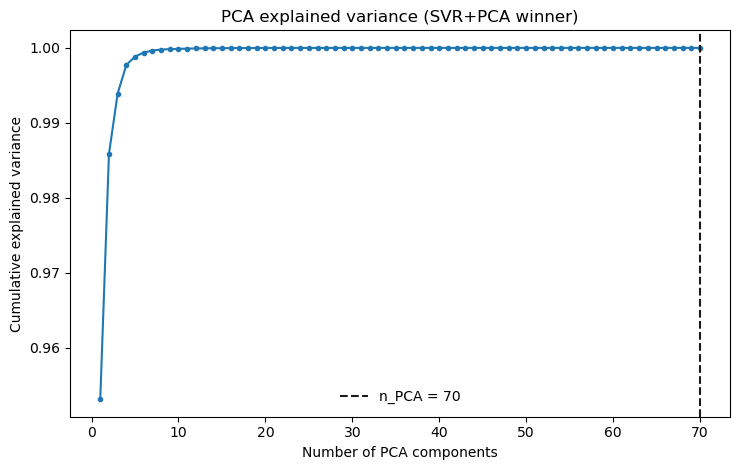

In [93]:
# Cell — Winner (Strategy 2): SVR (RBF) + PCA — metrics + 3 standard plots

# --- 1) Metrics + scatter (test) ---
svr_pca_pred = svr_pred  # from your SVR+PCA gridsearch cell
svr_pca_metrics = compute_metrics(y_test, svr_pca_pred)

best_params = svr_best.get_params()
n_pca = int(best_params["pca"].n_components) if best_params.get("pca", None) is not None else int(best_params["pca__n_components"])

display(pd.DataFrame(svr_pca_metrics, index=[f"SVR (RBF) + PCA (test), n_PCA={n_pca}"]))

plot_obs_pred(
    y_test,
    svr_pca_pred,
    title=f"SVR (RBF) + PCA (test) — n_PCA={n_pca}",
    color=COLORS["test"],
    metrics=svr_pca_metrics
)

# --- 2) CV RMSE curve vs PCA components (using the tuned best SVR params, vary PCA only) ---
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR

cv = KFold(n_splits=10, shuffle=True, random_state=SEED)

C_best = best_params["svr"].C
eps_best = best_params["svr"].epsilon
gamma_best = best_params["svr"].gamma

pca_grid_plot = [20, 40, 80, 120]  # must match what you searched (or expand if you want)
rmsecv_pca = []

for k in pca_grid_plot:
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=k, random_state=SEED)),
        ("svr", SVR(kernel="rbf", C=C_best, epsilon=eps_best, gamma=gamma_best)),
    ])
    y_cv = cross_val_predict(pipe, X_cal, y_cal, cv=cv).ravel()
    rmsecv_pca.append(compute_metrics(y_cal, y_cv)["RMSE"])

best_k = int(pca_grid_plot[int(np.argmin(rmsecv_pca))])

plot_rmsecv_curve(
    rmsecv_pca,
    best_n=best_k,
    title="SVR (RBF) + PCA optimization (10-fold CV) — RMSECV vs #PCs"
)

# --- 3) PLS-style coefficient plot is not applicable for SVR ---
# Instead: plot PCA explained variance (interpretability analog)
pca_fitted = svr_best.named_steps["pca"]
expl = np.cumsum(pca_fitted.explained_variance_ratio_)

plt.figure(figsize=(7.5, 4.8))
plt.plot(np.arange(1, len(expl) + 1), expl, marker="o", markersize=3, color=COLORS["cal"])
plt.axvline(n_pca, color=COLORS["full"], linestyle="--", linewidth=1.5, label=f"n_PCA = {n_pca}")
plt.xlabel("Number of PCA components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA explained variance (SVR+PCA winner)")
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

- svr does predict high SOC values way betetr in comaprson to base model!

## 3.3) Systematic ensemble approach

,R²,RMSE,Bias,RPD
Ensemble (0.5*SNV-PLSR + 0.5*SVR+PCA) — test,0.661043,9.816109,0.379535,1.719261


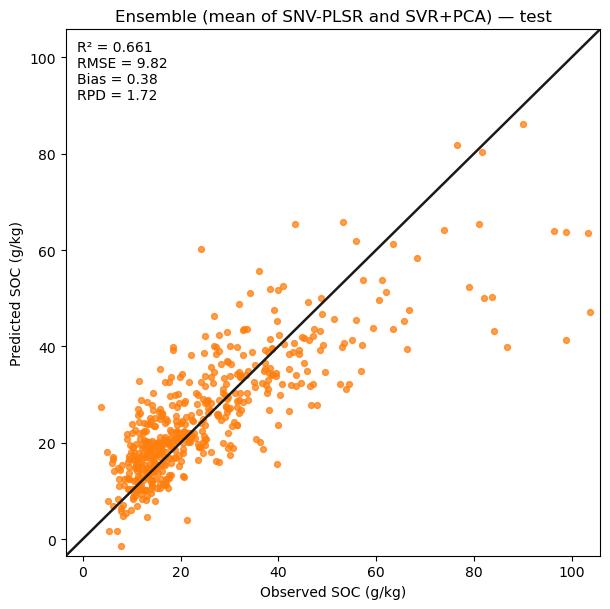

In [100]:
# Cell — High-level ensemble: average PLSR+SNV and SVR+PCA predictions (test)

# Ensure you have these from earlier steps:
# snv_pred = predictions["SNV"]
# svr_pred = svr_pred  (SVR+PCA winner predictions on test)

ens_pred = 0.5 * snv_pred + 0.5 * svr_pred
ens_metrics = compute_metrics(y_test, ens_pred)

display(pd.DataFrame(ens_metrics, index=["Ensemble (0.5*SNV-PLSR + 0.5*SVR+PCA) — test"]))

plot_obs_pred(
    y_test,
    ens_pred,
    title="Ensemble (mean of SNV-PLSR and SVR+PCA) — test",
    color=COLORS["test"],
    metrics=ens_metrics
)

- combination of the best methods, one non linear one linear:
    - **0.5*SNV-PLSR + 0.5*SVR+PCA**

## 3.4) Additional: Combine Spectral Processing with Fusion Model

In [95]:
# Cell — SVR (RBF) on SNV spectra

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Apply SNV
X_cal_snv = snv(X_cal_alg)
X_test_snv = snv(X_test_alg)

svr_snv_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="rbf")),
])

svr_snv_grid = {
    "svr__C": [10, 30, 100, 300, 1000],
    "svr__gamma": ["scale"],
    "svr__epsilon": [0.1, 0.2, 0.5],
}

svr_snv_res, svr_snv_pred, svr_snv_best = run_gridsearch(
    "SVR (RBF) + SNV",
    svr_snv_pipe,
    svr_snv_grid,
    X_cal_snv, y_cal,
    X_test_snv, y_test
)

,R²,RMSE,Bias,RPD
Ensemble (PLSR+SNV + SVR+PCA + SVR+SNV) — test,0.667637,9.720166,-0.076976,1.736232


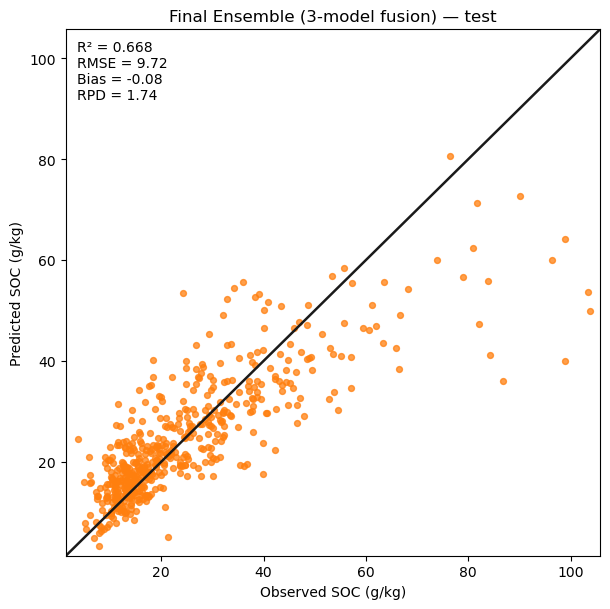

In [96]:
# Cell — Final 3-model ensemble (equal weighting)

ens3_pred = (snv_pred + svr_pred + svr_snv_pred) / 3.0

ens3_metrics = compute_metrics(y_test, ens3_pred)

display(pd.DataFrame(
    ens3_metrics,
    index=["Ensemble (PLSR+SNV + SVR+PCA + SVR+SNV) — test"]
))

plot_obs_pred(
    y_test,
    ens3_pred,
    title="Final Ensemble (3-model fusion) — test",
    color=COLORS["test"],
    metrics=ens3_metrics
)